# FramingHam Heart Disease Prediction

It is widely used for predicting the risk of developing Coronary Heart Disease (CHD) within 10 years.

We can build a classification model to predict whether a person is likely to develop TenYearCHD (1 = yes, 0 = no) based on their health and lifestyle factors.

### Possible Models we can use:

* Logistic Regression

* Random Forest

* Decision Tree

### We are using Logistic Regression:
Logistic Regression predicts probabilities between 0 and 1, making it perfect for yes/no outcomes like CHD risk.
So,

* It’s a binary classification problem

* We need probabilities, not continuous predictions

* It’s interpretable, efficient, and widely used in medical research



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:/Practice/framingham.csv")

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Exploratory Data Analysis (EDA)

In [4]:
df.shape

(4238, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df['cigsPerDay'].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [9]:
df['cigsPerDay'].max() #WTF 70 Cigs Kon Peeta hai ek din mein??????

np.float64(70.0)

In [10]:
df['BPMeds'].unique()

array([ 0.,  1., nan])

### Checking for Outliers

<Axes: ylabel='cigsPerDay'>

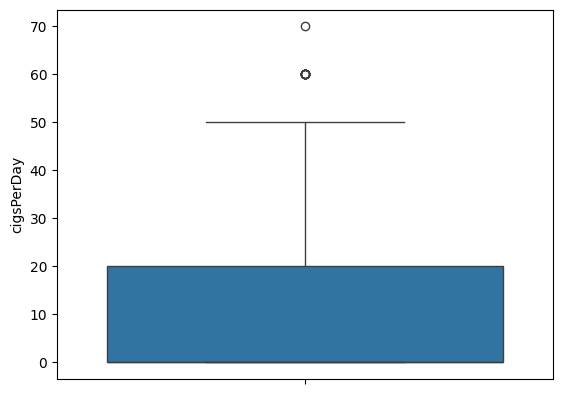

In [11]:
sns.boxplot(df['cigsPerDay'])

In [12]:
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True) 
#filled with median because it’s with outliers (like 60, 70), and median is less affected by extreme values (outliers).

<Axes: ylabel='cigsPerDay'>

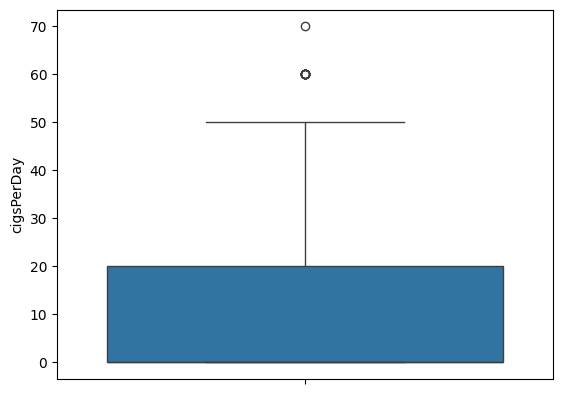

In [13]:
sns.boxplot(df['cigsPerDay'])

### Handling Missing Data

In [14]:
df['BPMeds'].fillna(0, inplace=True) #Filling with zero because most people aren't on BP Meds

In [15]:
df['totChol'].fillna(df['totChol'].median(), inplace=True)
#Filling with median because to handle missing cholesterol values without disturbance from high outliers.

In [16]:
df['BMI'].fillna(df['BMI'].median(), inplace=True) #Filling with median because to maintain realistic body mass values and most common one too

In [17]:
df['heartRate'].fillna(df['heartRate'].median(), inplace=True) #Filling with median because single missing value

In [18]:
# df.drop('glucose', axis =1 ,inplace=True) #Dropping because too many missing

In [19]:
df['glucose'].fillna(df['glucose'].median(), inplace=True) 
#Filling with median because it’s an important numeric health indicator and about less values are missing

In [20]:
# We can drop education column because its not correlated to Ten Year CHD, its correlation is near to 0

In [21]:
df.drop('education', axis=1, inplace=True)

In [22]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### 🩺 Count Plot – Heart Disease Cases

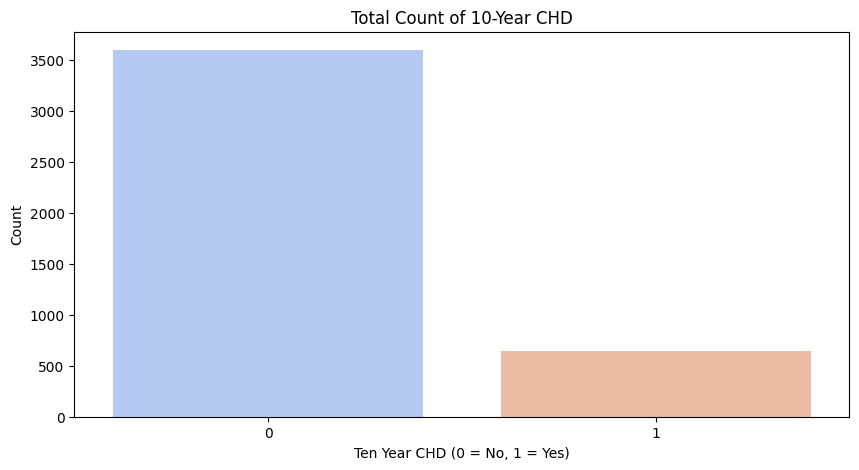

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'TenYearCHD', palette='coolwarm')
plt.title('Total Count of 10-Year CHD')
plt.xlabel('Ten Year CHD (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### 👵 Age Distribution by CHD Status

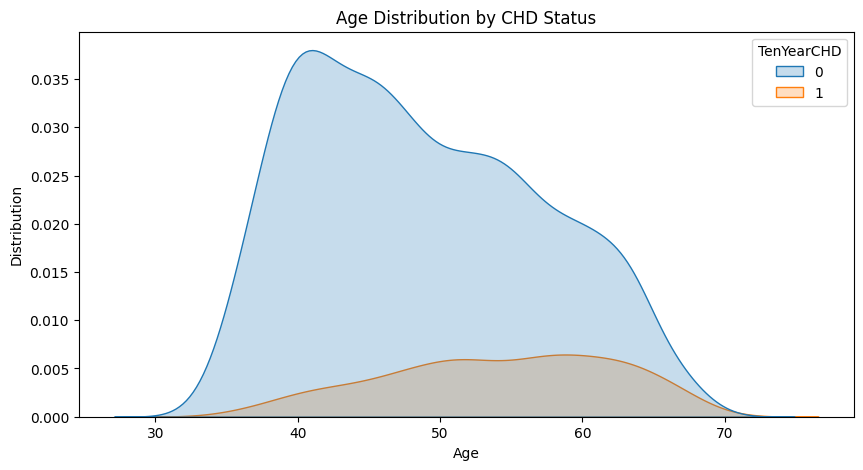

In [24]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='age', hue='TenYearCHD', fill=True)
plt.title('Age Distribution by CHD Status')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.show()

### 🚬 Smoking Habits and CHD

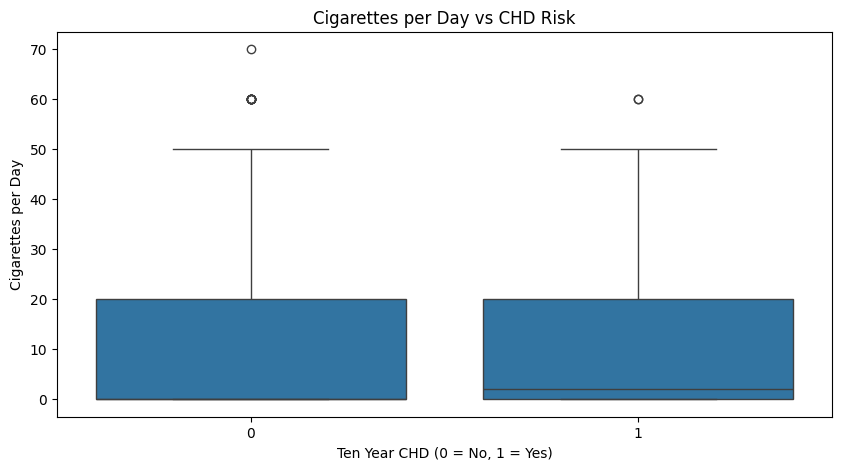

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x='TenYearCHD', y='cigsPerDay', data=df)
plt.title('Cigarettes per Day vs CHD Risk')
plt.xlabel('Ten Year CHD (0 = No, 1 = Yes)')
plt.ylabel('Cigarettes per Day')
plt.show()

### ❤️ Blood Pressure vs CHD

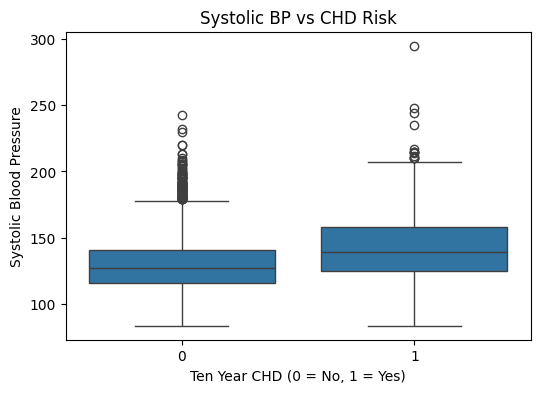

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x='TenYearCHD', y='sysBP', data=df)
plt.title('Systolic BP vs CHD Risk')
plt.xlabel('Ten Year CHD (0 = No, 1 = Yes)')
plt.ylabel('Systolic Blood Pressure')
plt.show()

## 📊 Correlation Heatmap

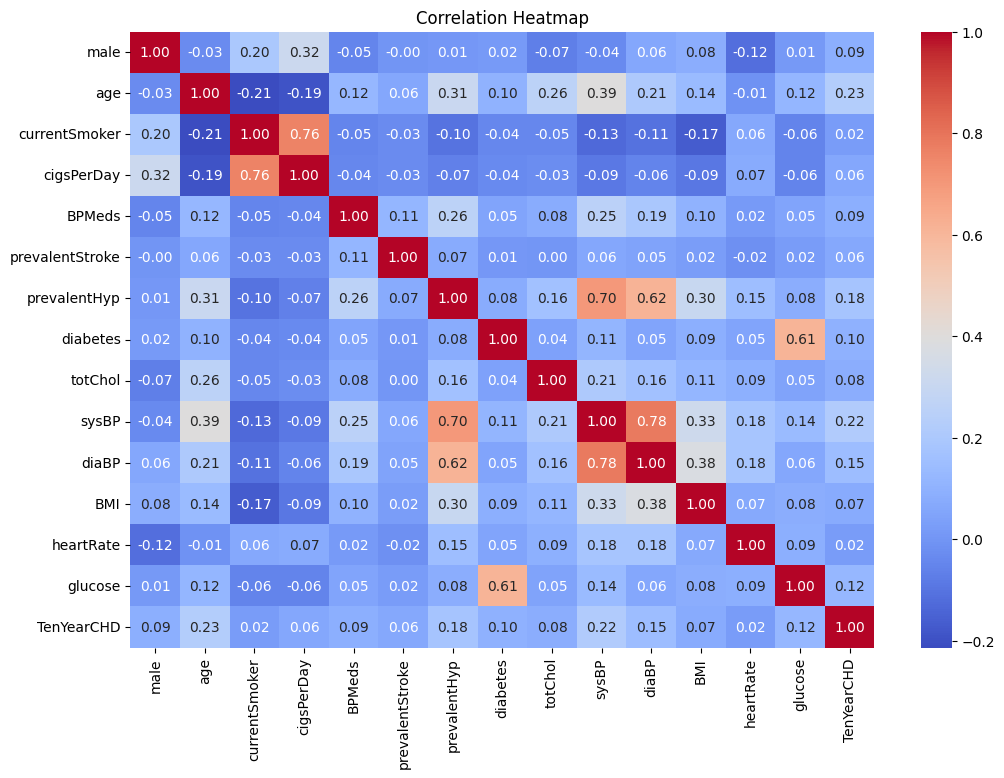

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [28]:
# sns.pairplot(df)

## Training Logistic Regression Model
### Splitting the dataset into training and testing data, and training the model on the training data

In [29]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3252,1,40,1,30.0,0.0,0,0,0,205.0,131.0,81.0,23.74,66.0,87.0
3946,0,57,0,0.0,0.0,0,1,0,250.0,152.5,92.5,32.31,75.0,94.0
1261,0,47,0,0.0,0.0,0,0,0,230.0,123.0,71.0,26.98,83.0,73.0
2536,1,41,1,30.0,0.0,0,0,0,228.0,113.0,82.5,25.67,67.0,70.0
4089,0,64,0,0.0,0.0,0,1,0,232.0,149.5,84.0,20.49,68.0,96.0


In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
y_pred = model.predict(X_test)

In [36]:
y_prob = model.predict_proba(X_test)[:,1]

In [37]:
pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred, 'Probability_of_pass' : y_prob})

,Actual,Predicted,Probability_of_pass
3188,0,0,0.400859
764,0,0,0.070688
3264,0,0,0.092524
1967,0,0,0.109047
2185,0,0,0.057421
...,...,...,...
3303,1,0,0.109020
4056,0,0,0.076266
4210,0,0,0.069500
3971,0,1,0.820064


## Checking for the Accuracy Score and Classification Report

In [38]:
from sklearn.metrics import accuracy_score, classification_report

In [39]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy Score:  0.8549528301886793
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.55      0.05      0.09       124

    accuracy                           0.85       848
   macro avg       0.70      0.52      0.51       848
weighted avg       0.81      0.85      0.80       848



In [40]:
df.head(2)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [41]:
new_patient = [[1, 45, 0, 0, 1, 1, 0, 0, 198, 106, 71, 36, 90, 80]]
pred = model.predict (new_patient)
print(f"Predicted Disease (0=Healthy, 1=Possible) : {pred[0]}")

Predicted Disease (0=Healthy, 1=Possible) : 0


## Prediction for 10-year CHD risk by inputing features from the user

In [42]:
features = [
    ('male', 'Gender (0 = Female, 1 = Male)'),
    ('age', 'Age (in years)'),
    ('currentSmoker', 'Are you a current smoker? (0 = No, 1 = Yes)'),
    ('cigsPerDay', 'Cigarettes per day'),
    ('BPMeds', 'On blood pressure meds? (0 = No, 1 = Yes)'),
    ('prevalentStroke', 'History of stroke? (0 = No, 1 = Yes)'),
    ('prevalentHyp', 'Hypertension present? (0 = No, 1 = Yes)'),
    ('diabetes', 'Diabetic? (0 = No, 1 = Yes)'),
    ('totChol', 'Total Cholesterol (mg/dL) eg: 195'),
    ('sysBP', 'Systolic BP eg : 106'),
    ('diaBP', 'Diastolic BP eg : 70'),
    ('BMI', 'Body Mass Index eg : 26'),
    ('heartRate', 'Heart Rate eg : 90'),
    ('glucose', 'Glucose level eg : 77')
]

user_input = []
for col, prompt in features:
    value = input(f"Enter {prompt} (default = 0): ") or 0
    user_input.append(float(value))

new_data = [user_input]
pred = model.predict(new_data)

print("Prediction for 10-year CHD risk is (0=Healthy, 1=Possible): ", pred)


Enter Gender (0 = Female, 1 = Male) (default = 0):  0
Enter Age (in years) (default = 0):  45
Enter Are you a current smoker? (0 = No, 1 = Yes) (default = 0):  0
Enter Cigarettes per day (default = 0):  0
Enter On blood pressure meds? (0 = No, 1 = Yes) (default = 0):  0
Enter History of stroke? (0 = No, 1 = Yes) (default = 0):  0
Enter Hypertension present? (0 = No, 1 = Yes) (default = 0):  0
Enter Diabetic? (0 = No, 1 = Yes) (default = 0):  0
Enter Total Cholesterol (mg/dL) eg: 195 (default = 0):  195
Enter Systolic BP eg : 106 (default = 0):  70
Enter Diastolic BP eg : 70 (default = 0):  80
Enter Body Mass Index eg : 26 (default = 0):  29
Enter Heart Rate eg : 90 (default = 0):  100
Enter Glucose level eg : 77 (default = 0):  77


Prediction for 10-year CHD risk is (0=Healthy, 1=Possible):  [0]
